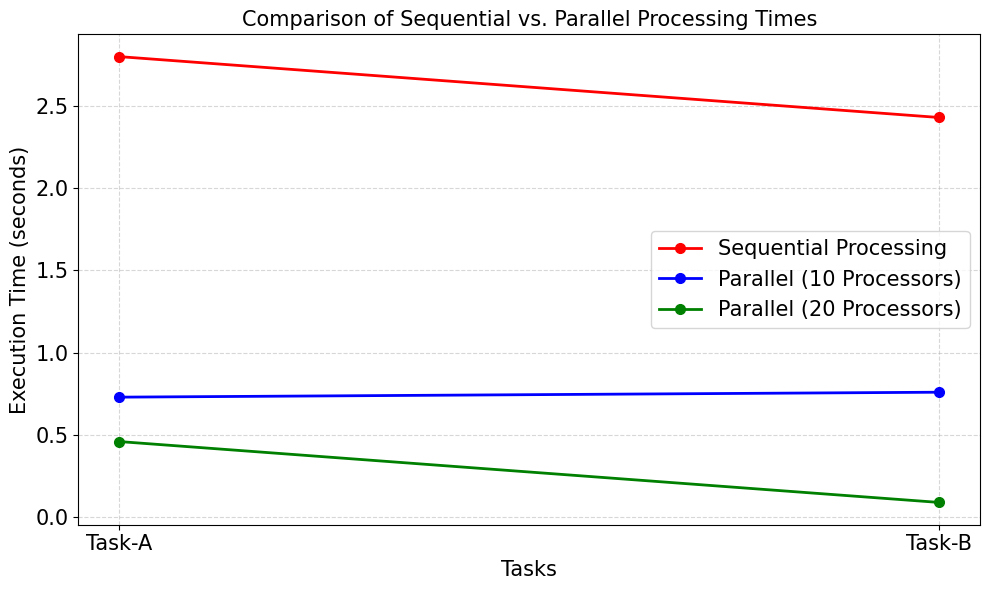

In [28]:
import matplotlib.pyplot as plt

tasks = ['Task-A', 'Task-B']
sequential_times = [2.80,  2.43]
parallel_10_processors = [0.73, 0.76]
parallel_20_processors = [0.46, 0.09]




colors = ['red', 'blue', 'green']  # Sequential, 10 Processors, 20 Processors

# Create figure and axes
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plotting lines with markers
ax.plot(tasks, sequential_times, marker='o', markersize=7, linewidth=2, color=colors[0], label='Sequential Processing')
ax.plot(tasks, parallel_10_processors, marker='o', markersize=7, linewidth=2, color=colors[1], label='Parallel (10 Processors)')
ax.plot(tasks, parallel_20_processors, marker='o', markersize=7, linewidth=2, color=colors[2], label='Parallel (20 Processors)')

# Set plot title and labels
plt.title('Comparison of Sequential vs. Parallel Processing Times', fontsize=15)
plt.xlabel('Tasks', fontsize=15)
plt.ylabel('Execution Time (seconds)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Customize legend and grid lines
plt.legend(fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


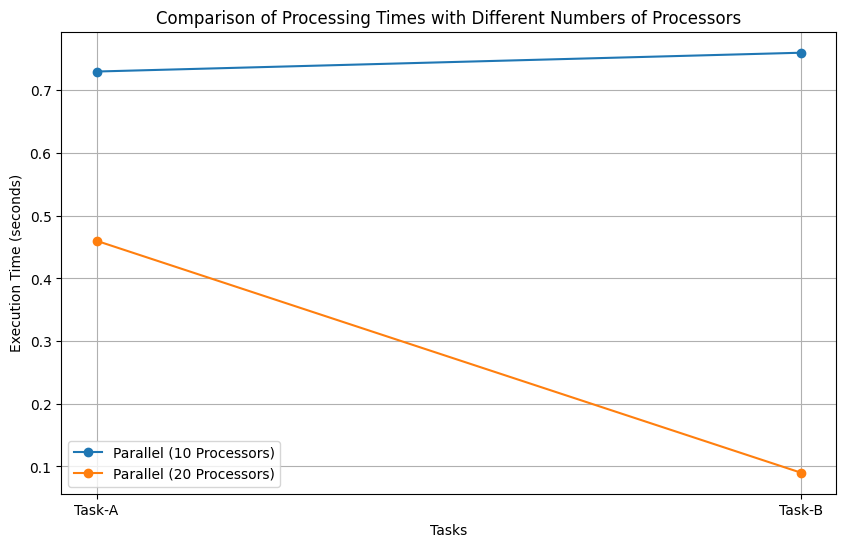

In [29]:
plt.figure(figsize=(10, 6))

plt.plot(tasks, parallel_10_processors, marker='o', label='Parallel (10 Processors)')
plt.plot(tasks, parallel_20_processors, marker='o', label='Parallel (20 Processors)')

plt.title('Comparison of Processing Times with Different Numbers of Processors')
plt.xlabel('Tasks')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


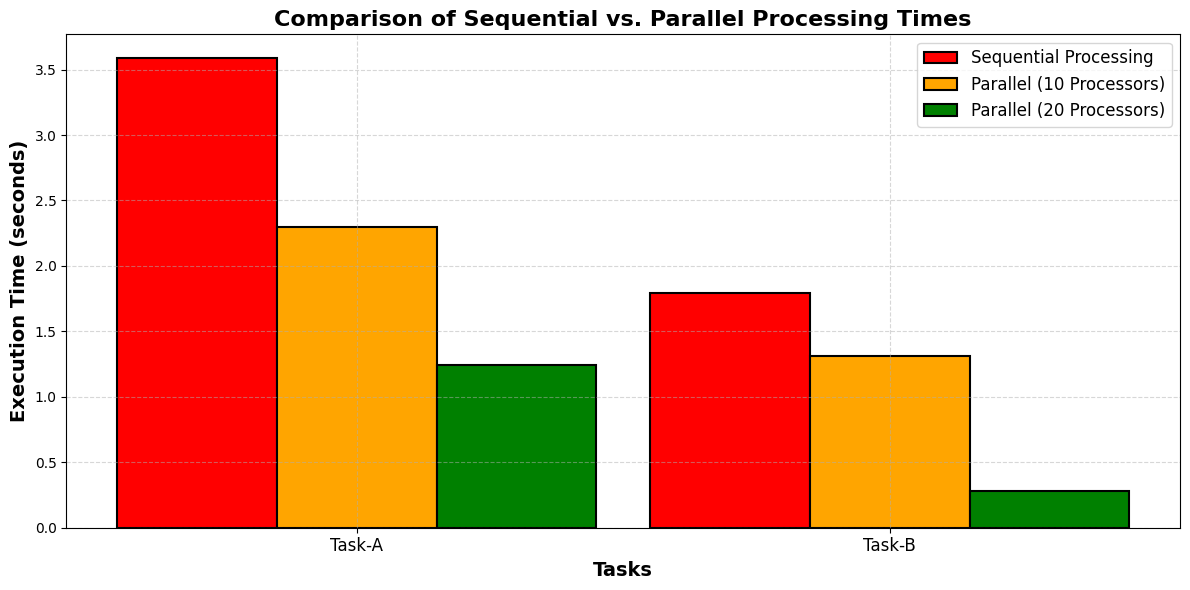

In [2]:
import matplotlib.pyplot as plt

# Data
tasks = ['Task-A', 'Task-B']
sequential_times = [3.59,  1.79]
parallel_10_processors = [2.30, 1.31]
parallel_20_processors = [1.24, 0.28]

# Plotting parameters
x = range(len(tasks))
width = 0.3
colors = ['red', 'orange', 'green']  # Sequential, 10 Processors, 20 Processors
legend_labels = ['Sequential Processing', 'Parallel (10 Processors)', 'Parallel (20 Processors)']

# Create figure and axes
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plotting bars with borders
for i, data in enumerate([sequential_times, parallel_10_processors, parallel_20_processors]):
    ax.bar([pos + i * width for pos in x], data, width, color=colors[i], edgecolor='black', linewidth=1.5, label=legend_labels[i])

# Set plot title and labels
plt.title('Comparison of Sequential vs. Parallel Processing Times', fontsize=16,fontweight='bold')
plt.xlabel('Tasks', fontsize=14,fontweight='bold')
plt.ylabel('Execution Time (seconds)', fontsize=14,fontweight='bold')
plt.xticks([pos + width for pos in x], tasks, fontsize=12)

# Customize legend and grid lines
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd
import time

# Load the datasets using Dask
trip_by_distance = dd.read_csv("Trips_by_Distance.csv", encoding='latin1', dtype={'Population Staying at Home': 'float64', 'Week': 'float64'})
trip_full_data = dd.read_csv("Trips_Full_Data.csv", delimiter='\t', assume_missing=True)

# Define the number of processors for parallel computing
num_processors = [10, 20]

# Dictionary to store time taken by each approach
time_taken_task_c = {}

# Apply parallel computing using Dask for Task C
for processors in num_processors:
    start_time_dask = time.time()
    avg_people_staying_at_home = trip_by_distance.groupby('Week')['Population Staying at Home'].mean().compute(num_workers=processors)
    avg_distance_traveled = trip_full_data[['Trips <1 Mile', 'Trips 1-3 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 10-25 Miles', 'Trips 25-50 Miles', 'Trips 50-100 Miles', 'Trips 100-250 Miles', 'Trips 250-500 Miles', 'Trips 500+ Miles']].mean().compute(num_workers=processors)
    dask_time = time.time() - start_time_dask
    time_taken_task_c[processors] = dask_time


# Visualization - Average number of people staying at home per week
plt.figure(figsize=(10, 6))
avg_people_staying_at_home.plot(kind='bar', color='purple')
plt.title('Average Number of People Staying at Home per Week', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Number of Weeks', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Average Number of People', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=90, fontsize=12, color='black')  # Rotate x-axis labels to horizontal
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Set y-axis ticks to integers without scientific notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
# Adjust layout to prevent clipping of labels
plt.tight_layout()
# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Visualization - Bar plot for the average distance people travel when not staying at home
plt.figure(figsize=(10, 6))
avg_distance_traveled.plot(kind='bar', color='#1f77b4')
plt.title('Average Distance Traveled When Not Staying at Home')
plt.xlabel('Distance Range')
plt.ylabel('Average Number of Trips')
plt.show()

# Print the time taken for Task C with different numbers of processors
print("Time taken to complete the task:")
for processors, time_taken in time_taken_task_c.items():
    print(f"- With {processors} processors: {time_taken} seconds")

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+--------------------------------+---------+----------+
| Column                         | Found   | Expected |
+--------------------------------+---------+----------+
| County Name                    | object  | float64  |
| Number of Trips                | float64 | int64    |
| Number of Trips 1-3            | float64 | int64    |
| Number of Trips 10-25          | float64 | int64    |
| Number of Trips 100-250        | float64 | int64    |
| Number of Trips 25-50          | float64 | int64    |
| Number of Trips 250-500        | float64 | int64    |
| Number of Trips 3-5            | float64 | int64    |
| Number of Trips 5-10           | float64 | int64    |
| Number of Trips 50-100         | float64 | int64    |
| Number of Trips <1             | float64 | int64    |
| Number of Trips >=500          | float64 | int64    |
| Population Not Staying at Home | float64 | int64    |
| State Postal Code              | object  | float64  |
+--------------------------------+---------+----------+

The following columns also raised exceptions on conversion:

- County Name
  ValueError("could not convert string to float: 'Garland County'")
- State Postal Code
  ValueError("could not convert string to float: 'AR'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'County Name': 'object',
       'Number of Trips': 'float64',
       'Number of Trips 1-3': 'float64',
       'Number of Trips 10-25': 'float64',
       'Number of Trips 100-250': 'float64',
       'Number of Trips 25-50': 'float64',
       'Number of Trips 250-500': 'float64',
       'Number of Trips 3-5': 'float64',
       'Number of Trips 5-10': 'float64',
       'Number of Trips 50-100': 'float64',
       'Number of Trips <1': 'float64',
       'Number of Trips >=500': 'float64',
       'Population Not Staying at Home': 'float64',
       'State Postal Code': 'object'}

to the call to `read_csv`/`read_table`.